<h1 style="text-align: center; text-decoration: underline;"><strong>--------MNIST Handwritten Digit Recognizer Project--------</strong></h1>

## <font color = "green">**Overview**</font>

The MNIST dataset is a well-known and widely used dataset in the machine learning community, particularly for tasks involving image classification. It consists of 70,000 grayscale images of handwritten digits, which are 28 pixels by 28 pixels in size and represent a single digit from 0 through 9. The images are divided into a training set of 60,000 images and a test set of 10,000 images. The dataset was created by NIST and has been widely used in research and academic settings for testing and evaluating machine learning models. 

The MNIST dataset is well-suited for testing machine learning models for image classification tasks, particularly those involving handwritten digits. By training a machine learning model on the MNIST dataset, we can build a system that is able to recognize handwritten digits from images. This can be useful in a variety of applications, such as automating the process of transcribing handwritten documents or building a system to recognize digits in financial documents. Additionally, the small size of the images in the MNIST dataset makes it easy to train and evaluate machine learning models, making it a valuable resource for researchers and practitioners working on image classification tasks.

#### This project will be divided into 3 main parts:

- **Working with images in Python**.
- **Feature Engineering**
- **Model Prediction and Evaluation**
 

#### Working with Images in Python:

In this part of the project, you’ll learn about how both the grayscale and RGB images are represented in the computer. Why RGB images consist of 3 channels and how these 3 channels are used to describe an image similarly why only 1 channel is used to represent a grayscale image. 

The main libraries that we’re going to use is NumPy and for visualization we’ll be using Matplotlib


#### Feature Engineering:

In this part we will be doing Feature Engineering with respect to images. Now you might be wondering what we mean when we say that we’re going to perform feature engineering with respect to images. Now for images we can create new features by creating new images. This can be done using data augmentation or creating a new image using 1 image just by rotating it or making some changes to it. This helps in increasing models’ robustness and make it more robust against unseen data.

To perform the Feature Engineering, we will be using ImageDataGenerator from keras pre-processing library

#### Model:

We will be creating a basic KNN Classifier and use it for prediction.
 

#### Link to Dataset

https://www.kaggle.com/competitions/digit-recognizer/data 
 

### <font color = "green">**Loading Libraries**</font>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
number = np.array(train.iloc[0,1:]).reshape(28,28)
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0])

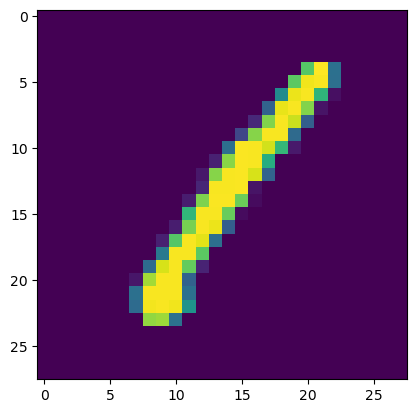

In [7]:
plt.imshow(number)

In [8]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)

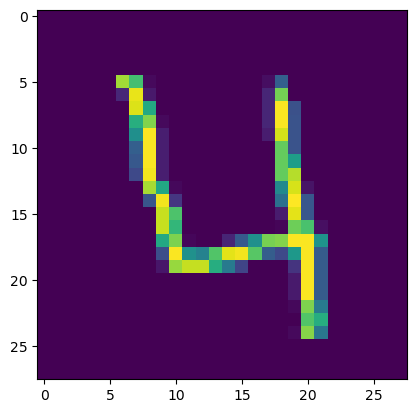

In [9]:
plt.imshow(number4)

In [10]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

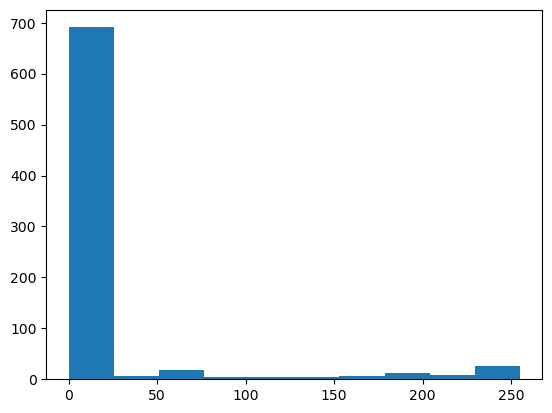

In [11]:
plt.hist(arr)

In [12]:
max(arr)

255

In [13]:
min(arr)

0

In [14]:
np.mean(arr)

np.float64(19.164540816326532)

### Missing Values

In [15]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [16]:
x = np.array(train)
y = np.array(test)

In [17]:
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y


## <font color = "green">**Feature Engineering**</font>

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1, 28, 28, 1)

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
    )
datagen.fit(X_train)

In [20]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## <font color = "green">**Model**</font>

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [25]:
prediction = knn.predict(X_test[60].reshape(1, -1))
result = prediction.item()  # Converts single-element array to scalar
print(int(result))

4


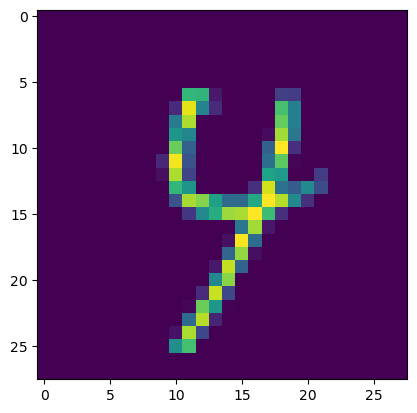

In [26]:
num = np.array(test.iloc[60,:]).reshape(28,28)
plt.imshow(num)